### Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [118]:
#Cargo el DataFrame
df_combined = pd.read_parquet('movies_data.parquet')


In [119]:
df_combined.describe()

,id,release_date,vote_average,vote_count,budget,revenue,return,release_year
count,9837.000000,9837,9837.000000,9837.000000,9.837000e+03,9.837000e+03,9837.000000,9837.000000
mean,106364.677239,1991-11-07 08:13:36.834400768,5.655586,112.835417,4.291168e+06,1.140682e+07,1.963629,1991.358443
min,3.000000,1891-04-30 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1891.000000
25%,25506.000000,1978-01-01 00:00:00,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,1978.000000
50%,57993.000000,2000-12-05 00:00:00,6.000000,10.000000,0.000000e+00,0.000000e+00,0.000000,2000.000000
75%,153420.000000,2010-11-12 00:00:00,6.800000,34.000000,0.000000e+00,0.000000e+00,0.000000,2010.000000
max,467731.000000,2018-11-07 00:00:00,10.000000,14075.000000,3.800000e+08,2.787965e+09,12890.386667,2018.000000
std,111740.824616,NaN,1.859041,531.346142,1.795222e+07,6.842863e+07,130.197110,24.441517


Podemos ver que las peliculas se estrenaron entre 1888 y 2017. La puntuacion promedio de las peliculas es de 5,62, el numero de votos tiene una gran variedad con un promerio de 110 lo que puede indicar que algunas peliculas tienen un numero muy alto de votos y el resto tiene muy pocos votos. Muchos valores en budget son 0. Estos pueden ser faltantes o peliculas con presupuestos bajos. La situacion en revenue es parecida a la columna budget ya que contiene muchos 0. La media es alta por algunas peliculas que tienen ingresos altos. Los resultados de la columna de retorno estan relacionados con los valores de budget y revenue.

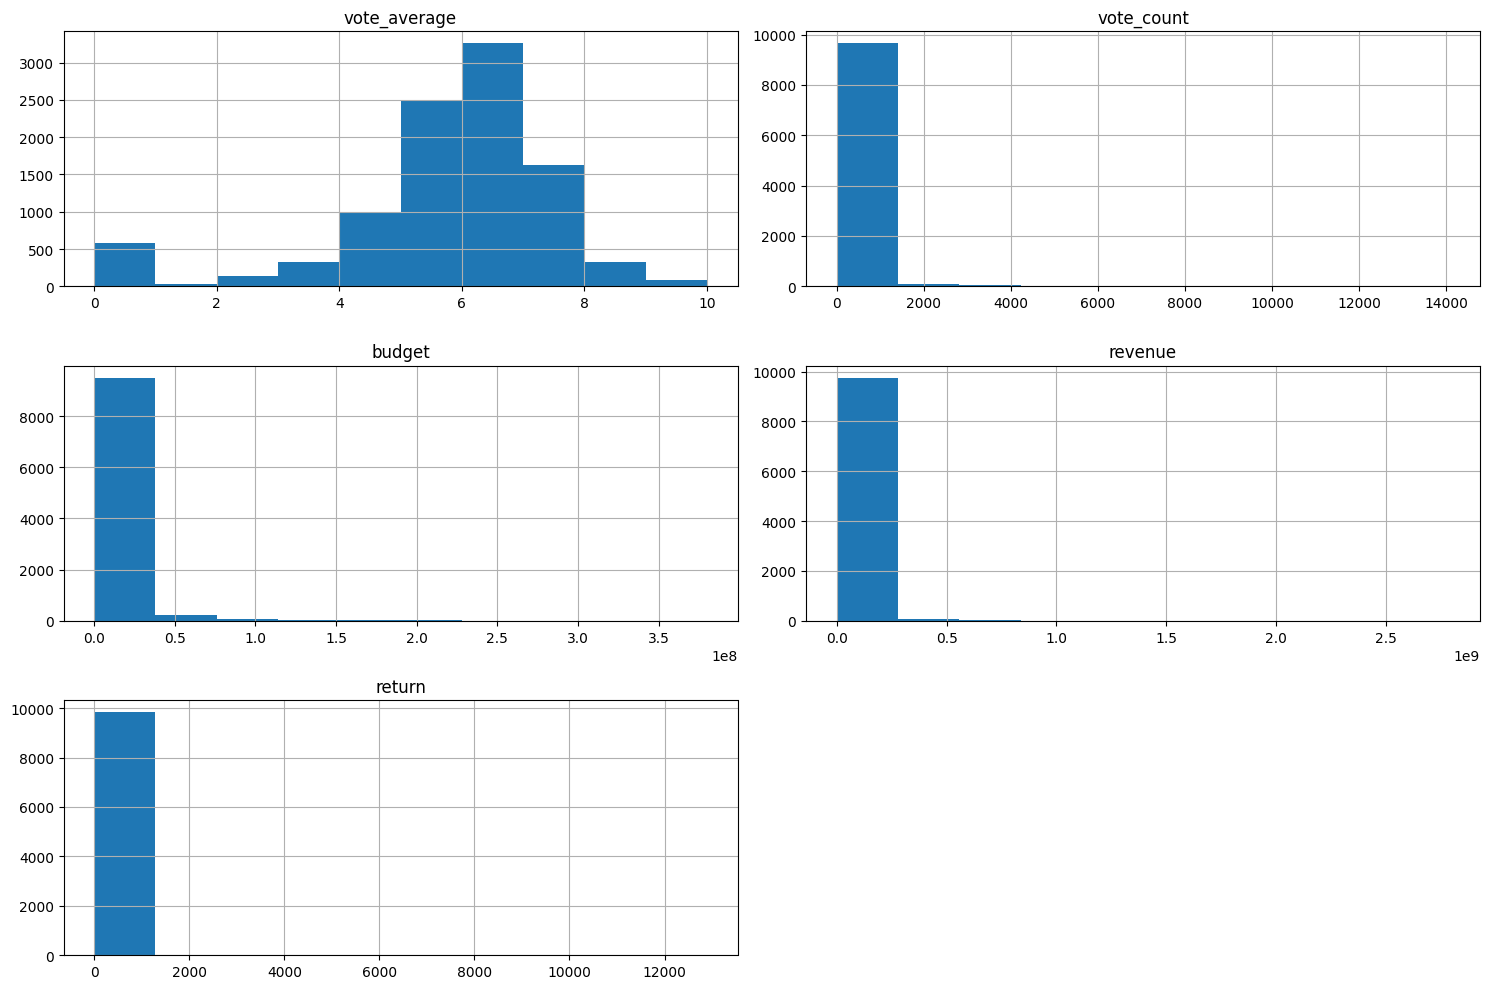

In [120]:
#Revisamos la distribucion de variables numericas
numeric_columns = ['vote_average', 'vote_count', 'budget', 'revenue', 'return']
df_combined[numeric_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.title('Distribucion de variables numéricas')
plt.show()

Muchas de las peliculas tienen un promedio de votos entre 4 y 8, otras con un promedio muy bajo. Una gran cantidad de peliculas tiene menos de 2000 votos y algunas tienen un numero extremadamente alto, lo que sugiere que pueden ser muy populares. Las columnas de budget, revenue y return tienen muchos valores que son 0 que pueden indicar que hay datos faltantes o pueden representar peliculas con bajo presupuesto o ingresos.

In [121]:
#Revisamps datos faltantes
df_combined.isnull().sum()

id                  0
title               0
release_date        0
vote_average        0
vote_count          0
budget              0
revenue             0
return              0
spoken_languages    0
release_year        0
overview            0
genres              0
actors              0
director            0
dtype: int64

In [122]:
#Identificamos outliers
columnas_analizar = ['vote_average', 'vote_count', 'budget', 'revenue', 'return']

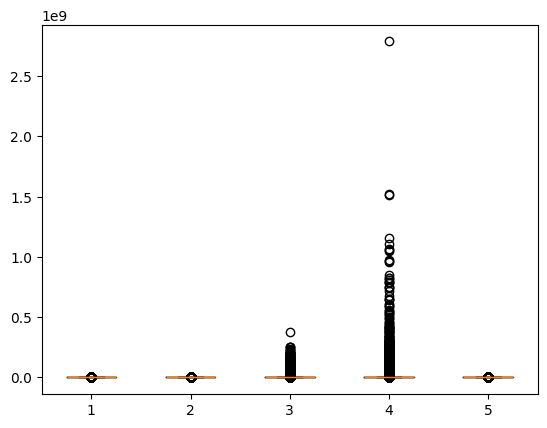

In [123]:
plt.boxplot(df_combined[columnas_analizar])
plt.show()

En el analisis previo, se observan outliers en las columnas vote_count, budget, revenue y return. Sin embargo, se ha decidio no hacer nada con ellos debido a que no se usaran en el modelo de recomendacion.

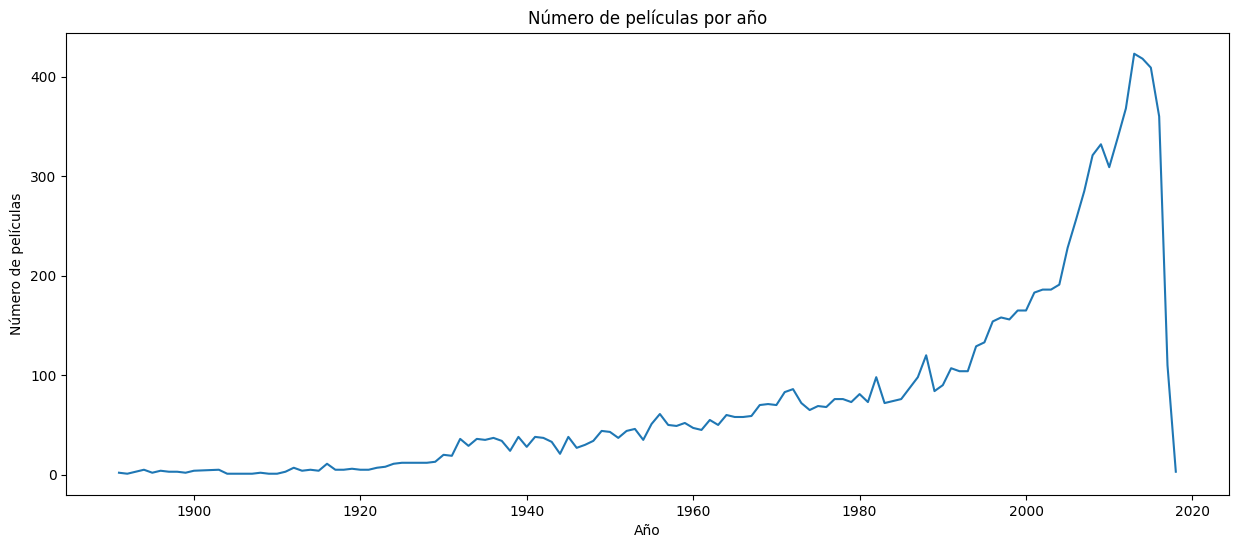

In [124]:
#Revisamos la distribución de películas por año
plt.figure(figsize=(15, 6))
df_combined['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()

#Este grafico de distribucion nos muestra que ha habido un aumento en el numero de peliculas estrenadas a los largo del tiempo, lo cual puede ser por muchos factores, por ejemplo: el crecimiento en el ambito cinematografico, la aparicion de nuevas tenologias de produccion y distribucion (streaming). 

In [125]:
df_combined['actors'].apply(type)

0       <class 'numpy.ndarray'>
1       <class 'numpy.ndarray'>
2       <class 'numpy.ndarray'>
3       <class 'numpy.ndarray'>
4       <class 'numpy.ndarray'>
                 ...           
9832    <class 'numpy.ndarray'>
9833    <class 'numpy.ndarray'>
9834    <class 'numpy.ndarray'>
9835    <class 'numpy.ndarray'>
9836    <class 'numpy.ndarray'>
Name: actors, Length: 9837, dtype: object

Debido a que me encuentro con el tipo 'numpy.ndarray' debo convertirlos para poder usar strings en la nube de palabras

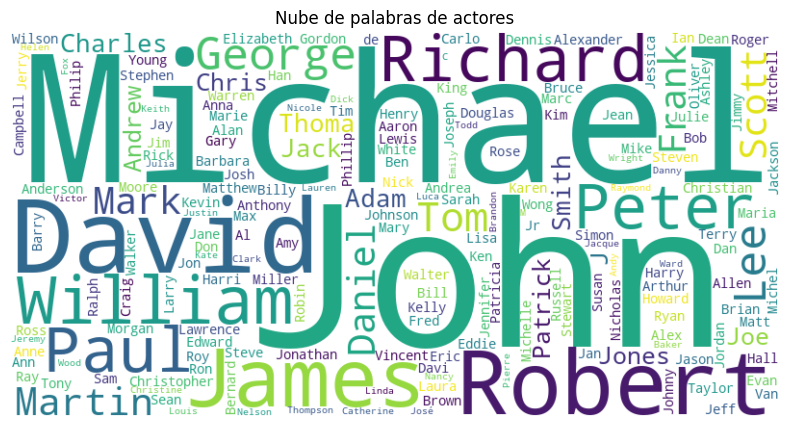

In [126]:
#Convierto a string
def convert_to_string(x):
    if isinstance(x, list):
        return ' '.join(map(str, x))
    elif isinstance(x, np.ndarray):
        return ' '.join(map(str, x.tolist()))
    elif isinstance(x, str):
        return x
    else:
        return str(x)
    
#Aplico la funcion
df_combined['actors'] = df_combined['actors'].apply(convert_to_string)

#Uno los nombres de actores en una sola cadena de texto
actors_text = ' '.join(df_combined['actors'])

wordcloud_actors = WordCloud(width=800, height=400, background_color='white').generate(actors_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_actors, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de actores')
plt.show()

Segun la nube de palabras, algunos de los nombres mas frecuentes son: "Robert", "John", "William", "James", "Michael", "David", "Peter" y "Paul" entre otros. Esto podria indicar que estos actores han participado en muchas de las peliculas del dataset.

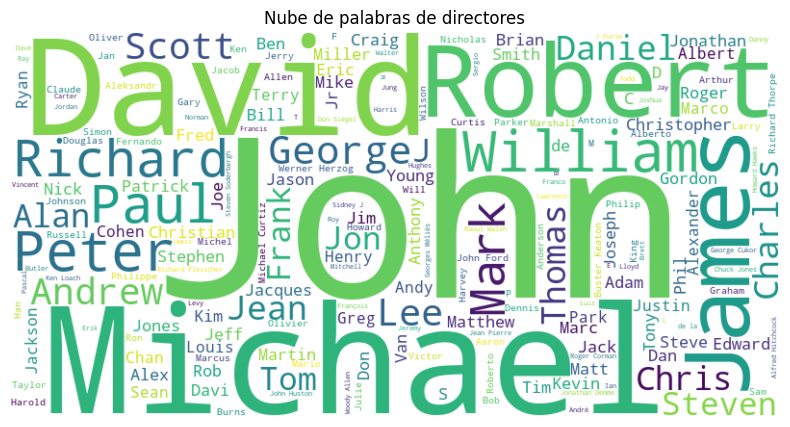

In [127]:
#Nube de palabras para directores
directors_text = ' '.join(df_combined['director'])
wordcloud_directors = WordCloud(width=800, height=400, background_color='white').generate(directors_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_directors, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de directores')
plt.show()

Segun la nube de palabras, algunos de los nombres mas frecuentes son: "John", "David", "Robert", "Richard", "Peter", "Andrew", "Martin", "Michael", "Mark" y "James". Esto podria indicar que estos directores son considerados algunos de los más reconocidos e influyentes en la historia del cine teniendo en cuenta mi dataset.

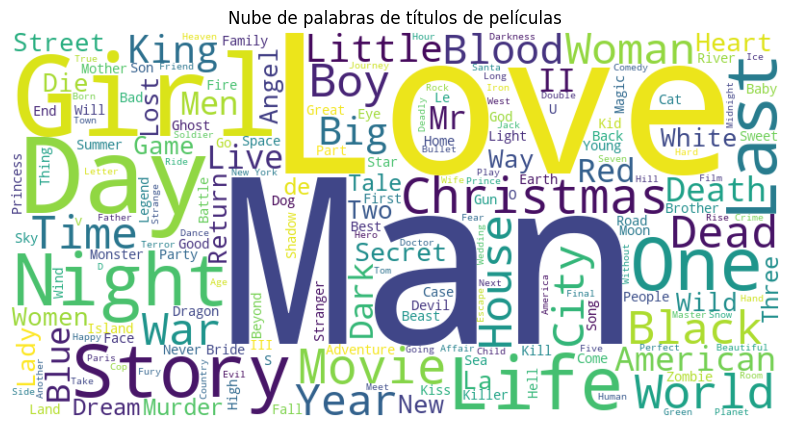

In [128]:
#Nube de palabras para títulos de películas
titles_text = ' '.join(df_combined['title'])
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de títulos de películas')
plt.show()

Segun la nube de palabras, algunos de los nombres mas frecuentes son: "Love", "Man", "Life", "Girl", "Night", "Boy", "Story", "Dead", "Day" y "Death" entre otras. Esto sugiere una gran variedad de genereos cinematograficos y temas comunes tales como el amor, la vida y la muerte, aventura, representacion femenina, popularidad de superherores entre otras, teniendo en cuenta mi dataset.

In [129]:
df_combined['genres'].apply(type)

0       <class 'numpy.ndarray'>
1       <class 'numpy.ndarray'>
2       <class 'numpy.ndarray'>
3       <class 'numpy.ndarray'>
4       <class 'numpy.ndarray'>
                 ...           
9832    <class 'numpy.ndarray'>
9833    <class 'numpy.ndarray'>
9834    <class 'numpy.ndarray'>
9835    <class 'numpy.ndarray'>
9836    <class 'numpy.ndarray'>
Name: genres, Length: 9837, dtype: object

In [130]:
#Convierto a string
def convert_to_string(x):
    if isinstance(x, list):
        return ' '.join(map(str, x))
    elif isinstance(x, np.ndarray):
        return ' '.join(map(str, x.tolist()))
    elif isinstance(x, str):
        return x
    else:
        return str(x)
    
#Aplico la funcion
df_combined['genres'] = df_combined['genres'].apply(convert_to_string)


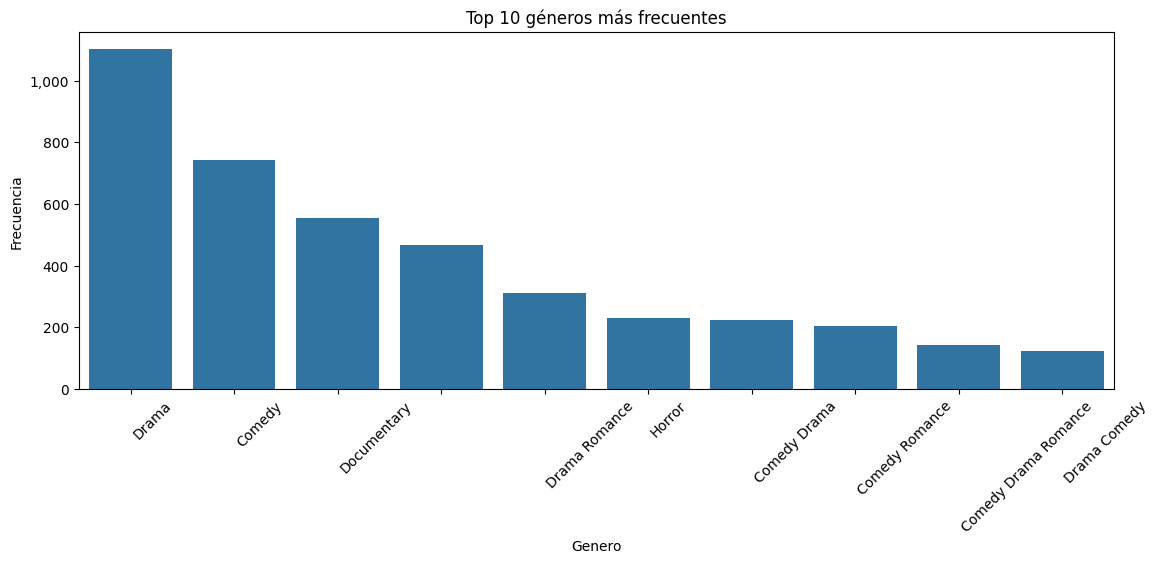

In [131]:
#Revisamos generos mas frecuentes
genres = df_combined['genres'].str.split(',', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 géneros más frecuentes')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout(pad=2.0)
plt.show()

Con este grafico podemos ver que el genero ma spopular es 'drama', la comedia y el romance tambien se encuentran entre los mas vistos. Es interesante destacar que la presencia de subgeneros que combinan algunos de los generos mas importantes como el drama romantico, comedia romantica y comedia dramatica. 

In [132]:
df_combined.head(5)

,id,title,release_date,vote_average,vote_count,budget,revenue,return,spoken_languages,release_year,overview,genres,actors,director
0,72354,Sunrise at Campobello,1960-09-28,6.3,2,0,0.0,0.000000,[English],1960,The story of Franklin Roosevelt's bout with po...,Drama History,Ralph Bellamy Greer Garson Hume Cronyn Jean Ha...,Vincent J. Donehue
1,11802,Space Chimps,2008-07-17,5.1,102,37000000,63800345.0,1.724334,[English],2008,Circus monkey Ham III works in a circus where ...,Animation Family,Andy Samberg Cheryl Hines Jeff Daniels Patrick...,Kirk De Micco
2,271433,Wir sind die Neuen,2014-07-17,6.6,28,0,0.0,0.000000,[Deutsch],2014,Three old friends from college move back in to...,Comedy,Gisela Schneeberger Heiner Lauterbach Michael ...,Ralf Westhoff
3,358962,Queen of Spades: The Dark Rite,2015-09-10,5.3,10,1000000,2228115.0,2.228115,[Pусский],2015,There is an ancient ritual known to humankind ...,Thriller Horror Mystery,Alina Babak Valeriya Dmitrieva Igor Khripunov ...,Svyatoslav Podgayevskiy
4,412669,First Round Down,2017-03-04,10.0,1,0,0.0,0.000000,[],2017,Tim Tucker (Dylan Bruce) was a star forward wh...,Action Comedy,Dylan Bruce Percy Hynes White,Brett M. Butler


Debido al analisis realizado, elegiremos las siguientes columnas para un modelo de recomendación basado en contenido, no incluimos las numericas y tampoco las de popularidad y de produccion: 'title', 'genres', 'overview', 'actors' y 'directores'

In [133]:
#Guardo en un nuevo df las columnas para el modelo
df_recomendacion = df_combined[['title', 'genres', 'overview', 'actors', 'director']]

In [136]:
# Combinar las características en una sola columna
df_recomendacion['features'] = df_recomendacion['genres'] + ' ' + df_recomendacion['overview'] + ' ' + df_recomendacion['actors'] + ' ' + df_recomendacion['director']

In [137]:
df_recomendacion.to_parquet('df_recomendacion.parquet', index=False)